# Solve with `findiff`

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from findiff import PDE, BoundaryConditions, Coef, FinDiff, Identity
from matplotlib import cm

In [29]:
shape = (300,)
t, dt = np.linspace(start=0, stop=10, num=shape[0], retstep=True)

In [30]:
L = FinDiff(0, dt, 2) - FinDiff(0, dt, 1) + Coef(5) * Identity()
f = np.cos(2 * t)

In [31]:
bc = BoundaryConditions(shape)
bc[0] = 0
bc[-1] = 1

In [32]:
pde = PDE(L, f, bc)

In [33]:
u = pde.solve()

In [34]:
u.shape

(300,)

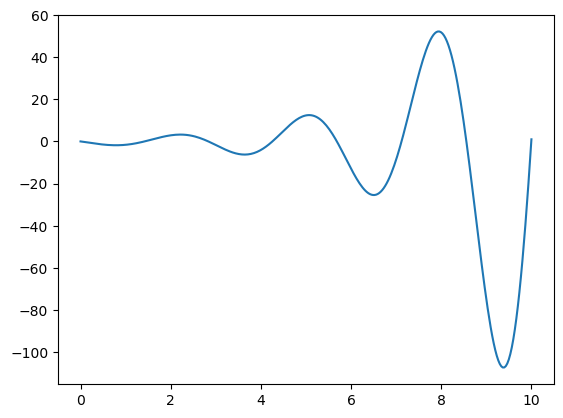

In [35]:
plt.plot(t, u);

In [36]:
shape = (100, 100)
x, dx = np.linspace(start=0, stop=1, num=shape[0], retstep=True)
y, dy = np.linspace(start=0, stop=1, num=shape[1], retstep=True)
X, Y = np.meshgrid(x, y, indexing="ij")

L = FinDiff(0, dx, 2) + FinDiff(1, dy, 2)
f = np.zeros(shape)

bc = BoundaryConditions(shape)
bc[1, :] = FinDiff(0, dx, 1), 0  # Neumann BC
bc[-1, :] = 300.0 - 200 * Y  # Dirichlet BC
bc[:, 0] = 300.0  # Dirichlet BC
bc[1:-1, -1] = FinDiff(1, dy, 1), 0  # Neumann BC

pde = PDE(L, f, bc)
u = pde.solve()

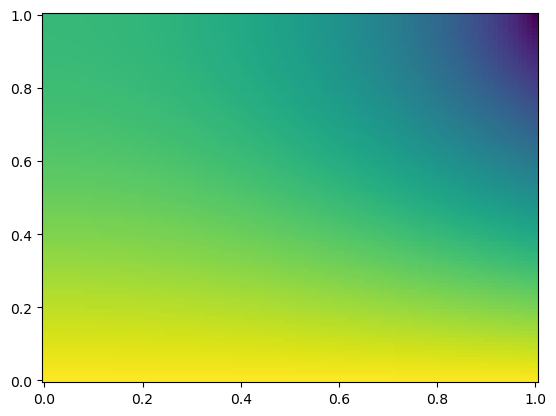

In [39]:
plt.pcolor(X, Y, u);